# Correlaciones entre Santo Tomé y las estaciones de Ángela, Hondo y Pinedo.

Es necesario para ver como se relacionan dichas estaciones entre sí y ver si el comportamiento son parecidos a las estimaciones satelitales.

## Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt
import shapefile
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize 
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.geometry import mapping
from datetime import timedelta, date, datetime

In [208]:
def autocorr(self, lag=1):
    """
    Lag-N autocorrelation

    Parameters
    ----------
    lag : int, default 1
        Number of lags to apply before performing autocorrelation.

    Returns
    -------
    autocorr : float
    """
    return self.corr(self.shift(lag))

In [209]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

## Abro los archivos

In [4]:
#creación del path de las variables:
path = f'{workspace}tesis/datos/'
altura_rio_file = 'procesados/datosAlturaDeRio_sorted_true.nc'
pinedo_file = 'crudos/validacion/general_pinedo.csv'
hondo_file = 'crudos/validacion/pozo_hondo.csv'
angela_file = 'crudos/validacion/villa_angela.csv'

In [143]:
ds_angela = pd.read_csv(path+angela_file)
ds_hondo = pd.read_csv(path+hondo_file)
ds_pinedo = pd.read_csv(path+pinedo_file)
ds_altura = xr.open_dataset(path+altura_rio_file, engine='netcdf4')

In [135]:
ds_altura

<xarray.Dataset>
Dimensions:         (time: 4503)
Coordinates:
  * time            (time) datetime64[ns] 2007-01-01 2007-01-02 ... 2019-04-30
    reference_time  datetime64[ns] ...
Data variables:
    calchaqui       (time) float64 ...
    cululu          (time) float64 ...
    emilia          (time) float64 ...
    alasconchas     (time) float64 ...
    manucho         (time) float64 ...
    recreo          (time) float64 ...
    asanantonio     (time) float64 ...
    sanjusto        (time) float64 ...
    puertosantafe   (time) float64 ...
    santotome       (time) float64 ...
    tostado         (time) float64 ...
Attributes:
    description:  Altura de rio en mts

## Calculo para angela

In [144]:
ds_angela['Fecha'] = pd.to_datetime(ds_angela['Fecha'])
ds_angela.sort_values(by='Fecha', inplace=True)
ds_angela.reset_index(drop=True,inplace=True)
ds_angela.set_index('Fecha', drop=True, inplace=True)
ds_angela

,Temperatura,Temp suelo,Humedad,Humedad suelo,Humedad hoja,Presion,Vel viento,Dir viento,Vel viento max,Dir viento max,Precip,Radiacion,Luz dia
Fecha,,,,,,,,,,,,,
2017-12-18 03:10:00,20.7800,NaN,83.0900,NaN,NaN,1008.12,12.009700,202.5,22.18880,360.0,0.0,0.000,NaN
2017-12-18 03:20:00,20.7800,NaN,80.5100,NaN,NaN,1007.50,12.311500,180.0,24.88440,360.0,0.0,0.000,NaN
2017-12-18 03:30:00,20.8100,NaN,78.6900,NaN,NaN,1008.12,13.256900,180.0,25.62870,360.0,0.0,0.000,NaN
2017-12-18 03:40:00,20.7900,NaN,77.2500,NaN,NaN,1009.38,14.504200,180.0,25.18620,360.0,0.0,0.000,NaN
2017-12-18 03:50:00,20.7200,NaN,76.6300,NaN,NaN,1006.88,13.498300,180.0,26.57420,360.0,0.0,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19 12:30:00,23.6955,NaN,93.0595,NaN,NaN,1005.62,0.281635,202.5,12.51260,NaN,0.0,852.618,NaN
2022-01-19 12:40:00,23.7157,NaN,93.3280,NaN,NaN,1006.88,0.321869,202.5,20.19730,NaN,0.0,534.333,NaN
2022-01-19 12:50:00,23.6854,NaN,93.1754,NaN,NaN,1005.62,0.000000,202.5,6.29656,NaN,0.0,503.469,NaN


In [163]:
ds_angela_pp = ds_angela[['Precip']]
ds_angela_diaria = ds_angela_pp.resample('D', offset='09:00:00').Precip.sum()

## Calculo para hondo

In [164]:
ds_hondo['Fecha'] = pd.to_datetime(ds_hondo['Fecha'])
ds_hondo.sort_values(by='Fecha', inplace=True)
ds_hondo.reset_index(drop=True,inplace=True)
ds_hondo.set_index('Fecha', drop=True, inplace=True)
ds_hondo

KeyError: 'Fecha'

In [165]:
ds_hondo_pp = ds_hondo[['Precip']]
ds_hondo_diaria = ds_hondo_pp.resample('D', offset='09:00:00').Precip.sum()

## Calculo para pinedo

In [145]:
ds_pinedo['Fecha'] = pd.to_datetime(ds_pinedo['Fecha'])
ds_pinedo.sort_values(by='Fecha', inplace=True)
ds_pinedo.reset_index(drop=True,inplace=True)
ds_pinedo.set_index('Fecha', drop=True, inplace=True)
ds_pinedo

,Temperatura,Temp suelo,Humedad,Humedad suelo,Humedad hoja,Presion,Vel viento,Dir viento,Vel viento max,Dir viento max,Precip,Radiacion,Luz dia
Fecha,,,,,,,,,,,,,
2017-12-18 03:10:00,20.5300,NaN,85.1800,NaN,NaN,1008.12,4.64697,202.5,12.2511,360.0,0.0,0.000,NaN
2017-12-18 03:20:00,20.5000,NaN,84.9800,NaN,NaN,1009.38,4.64697,202.5,13.4380,360.0,0.0,0.000,NaN
2017-12-18 03:30:00,20.5000,NaN,83.0800,NaN,NaN,1006.88,6.75923,225.0,18.5879,360.0,0.0,0.000,NaN
2017-12-18 03:40:00,20.5200,NaN,82.0500,NaN,NaN,1008.12,6.25631,202.5,15.1881,360.0,0.0,0.000,NaN
2017-12-18 03:50:00,20.5100,NaN,80.1100,NaN,NaN,1009.38,7.68460,202.5,19.0103,360.0,0.0,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19 13:00:00,23.8063,NaN,90.6116,NaN,NaN,1004.38,7.34263,180.0,23.8988,NaN,0.0,301.978,NaN
2022-01-19 13:10:00,23.9070,NaN,90.4835,NaN,NaN,1003.75,8.83127,157.5,21.8670,NaN,0.0,316.484,NaN
2022-01-19 13:20:00,24.1790,NaN,89.8425,NaN,NaN,1004.38,8.00649,135.0,18.0045,NaN,0.0,297.143,NaN


In [166]:
ds_pinedo_pp = ds_pinedo[['Precip']]
ds_pinedo_diaria = ds_pinedo_pp.resample('D', offset='09:00:00').Precip.sum()

In [170]:
ds_pinedo_diaria

Fecha
2017-12-17 09:00:00     0.0
2017-12-18 09:00:00     0.0
2017-12-19 09:00:00     1.2
2017-12-20 09:00:00     0.0
2017-12-21 09:00:00     2.8
                       ... 
2022-01-15 09:00:00     0.0
2022-01-16 09:00:00     0.0
2022-01-17 09:00:00    22.2
2022-01-18 09:00:00    29.4
2022-01-19 09:00:00     1.4
Freq: D, Name: Precip, Length: 1495, dtype: float64

## Creacion de dataframe con todo los valores

In [179]:
df_angela_pp = pd.DataFrame(ds_angela_diaria.values,index=ds_angela_diaria.index ,columns=['angela'])
df_hondo_pp = pd.DataFrame(ds_hondo_diaria.values,index=ds_hondo_diaria.index ,columns=['hondo'])
df_pinedo_pp = pd.DataFrame(ds_pinedo_diaria.values,index=ds_pinedo_diaria.index, columns=['pinedo'])

In [181]:
ds_pp_completo = pd.concat([df_angela_pp,df_hondo_pp,df_pinedo_pp],axis=1)

<AxesSubplot:xlabel='Fecha'>

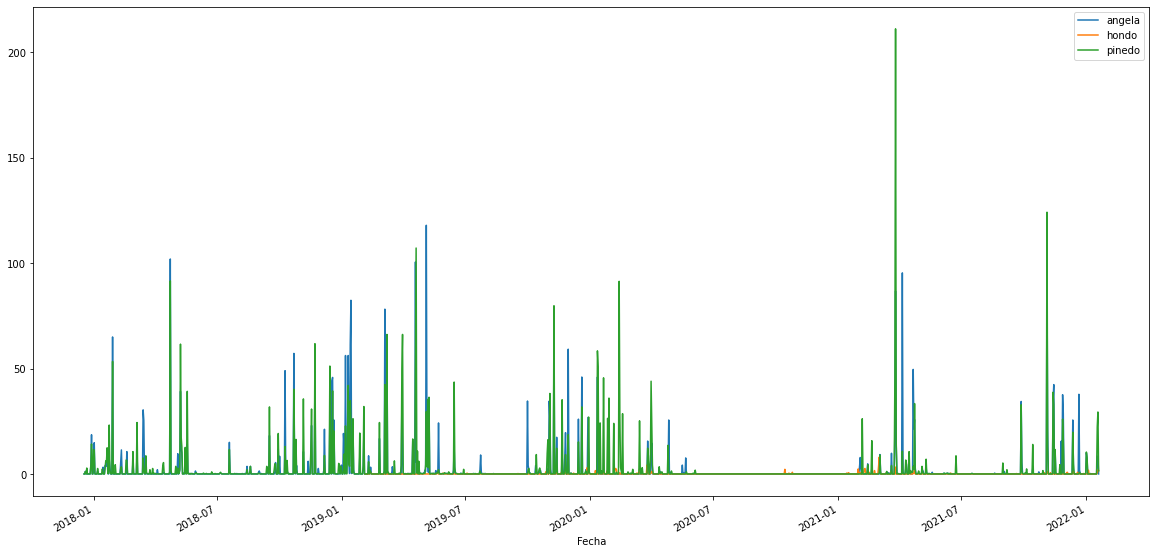

In [183]:
ds_pp_completo.plot(figsize=(20,10))

In [184]:
ds_pp_completo.isna().sum()

angela      0
hondo     414
pinedo      0
dtype: int64

In [187]:
ds_pp_completo

,angela,hondo,pinedo
Fecha,,,
2017-12-17 09:00:00,0.0,NaN,0.0
2017-12-18 09:00:00,0.0,NaN,0.0
2017-12-19 09:00:00,1.2,NaN,1.2
2017-12-20 09:00:00,0.0,NaN,0.0
2017-12-21 09:00:00,0.0,NaN,2.8
...,...,...,...
2022-01-15 09:00:00,0.0,0.0,0.0
2022-01-16 09:00:00,0.0,0.0,0.0
2022-01-17 09:00:00,8.4,0.4,22.2


In [205]:
ds_pp_rango = ds_pp_completo.loc['2017-12-17 09:00:00':'2019-04-30 09:00:00']
ds_pp_rango

,angela,hondo,pinedo
Fecha,,,
2017-12-17 09:00:00,0.0,NaN,0.0
2017-12-18 09:00:00,0.0,NaN,0.0
2017-12-19 09:00:00,1.2,NaN,1.2
2017-12-20 09:00:00,0.0,NaN,0.0
2017-12-21 09:00:00,0.0,NaN,2.8
...,...,...,...
2019-04-26 09:00:00,0.2,0.0,0.4
2019-04-27 09:00:00,0.2,0.0,0.2
2019-04-28 09:00:00,0.2,0.0,0.2


<AxesSubplot:xlabel='Fecha'>

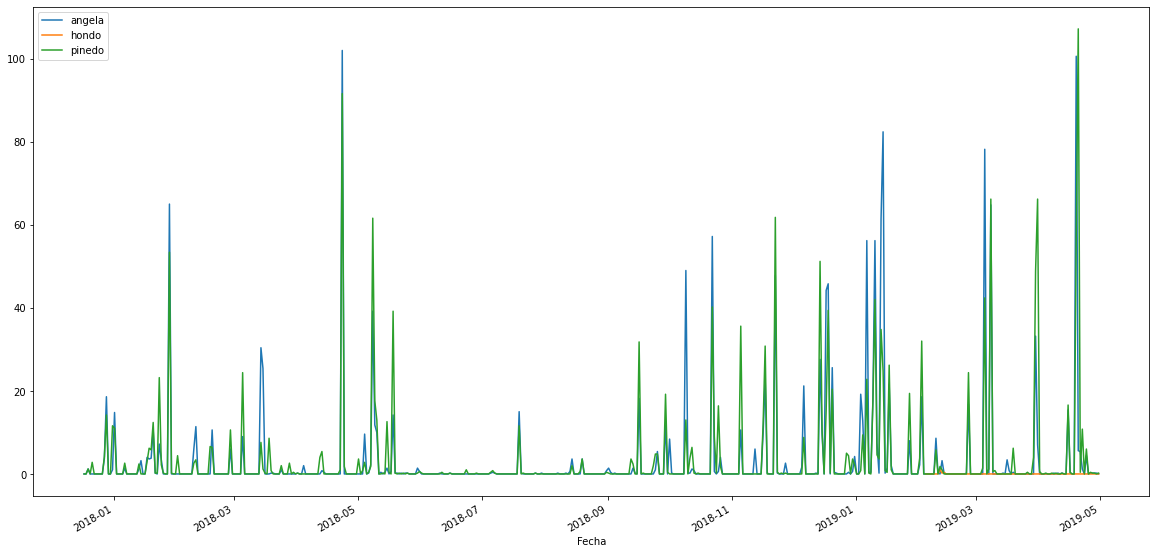

In [206]:
ds_pp_rango.plot(figsize=(20,10))

In [204]:
ds_santoto = ds_altura.santotome.sel(time=slice('2017-12-17','2019-04-30'))
ds_santoto

<xarray.DataArray 'santotome' (time: 500)>
array([3.75, 3.74, 3.71, ..., 4.06, 4.07, 4.08])
Coordinates:
  * time            (time) datetime64[ns] 2017-12-17 2017-12-18 ... 2019-04-30
    reference_time  datetime64[ns] 2006-12-31

In [217]:
pd.Series(ds_santoto, index=ds_pp_rango.index)

Fecha
2017-12-17 09:00:00    3.75
2017-12-18 09:00:00    3.74
2017-12-19 09:00:00    3.71
2017-12-20 09:00:00    3.69
2017-12-21 09:00:00    3.67
                       ... 
2019-04-26 09:00:00    3.99
2019-04-27 09:00:00    4.01
2019-04-28 09:00:00    4.06
2019-04-29 09:00:00    4.07
2019-04-30 09:00:00    4.08
Freq: D, Length: 500, dtype: float64

### Correlaciones entre estaciones y santo tome

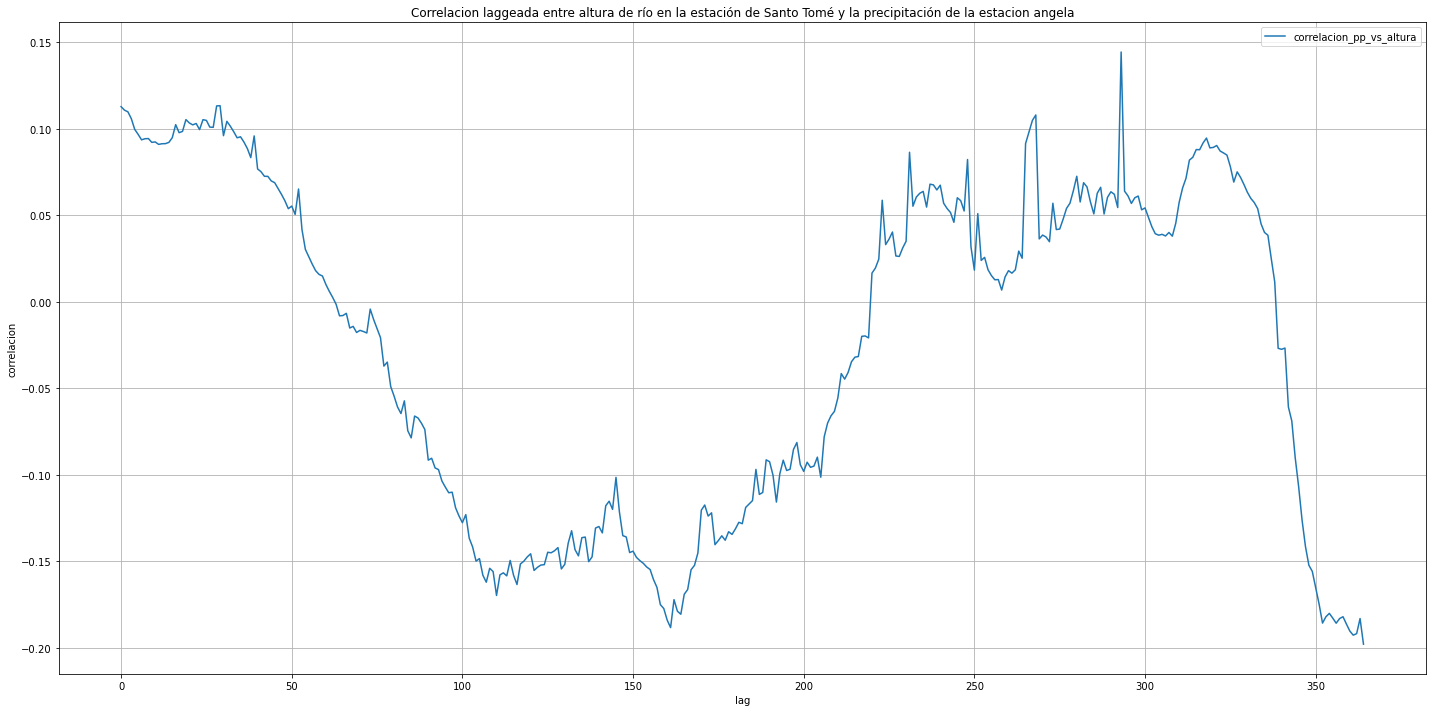

In [239]:
estacion = 'angela'
correlaciones = [crosscorr(pd.Series(ds_pp_rango[estacion]), pd.Series(ds_santoto, index=ds_pp_rango.index), lag=i) for i in range(365)]
pd.DataFrame(correlaciones,columns=['correlacion_pp_vs_altura'], index=np.arange(len(correlaciones))).plot(figsize=(20,10),xlabel='lag', ylabel='correlacion', legend=True)
plt.grid()
plt.title('Correlacion laggeada entre altura de río en la estación de Santo Tomé y la precipitación de la estacion {}'.format(estacion))
plt.tight_layout()

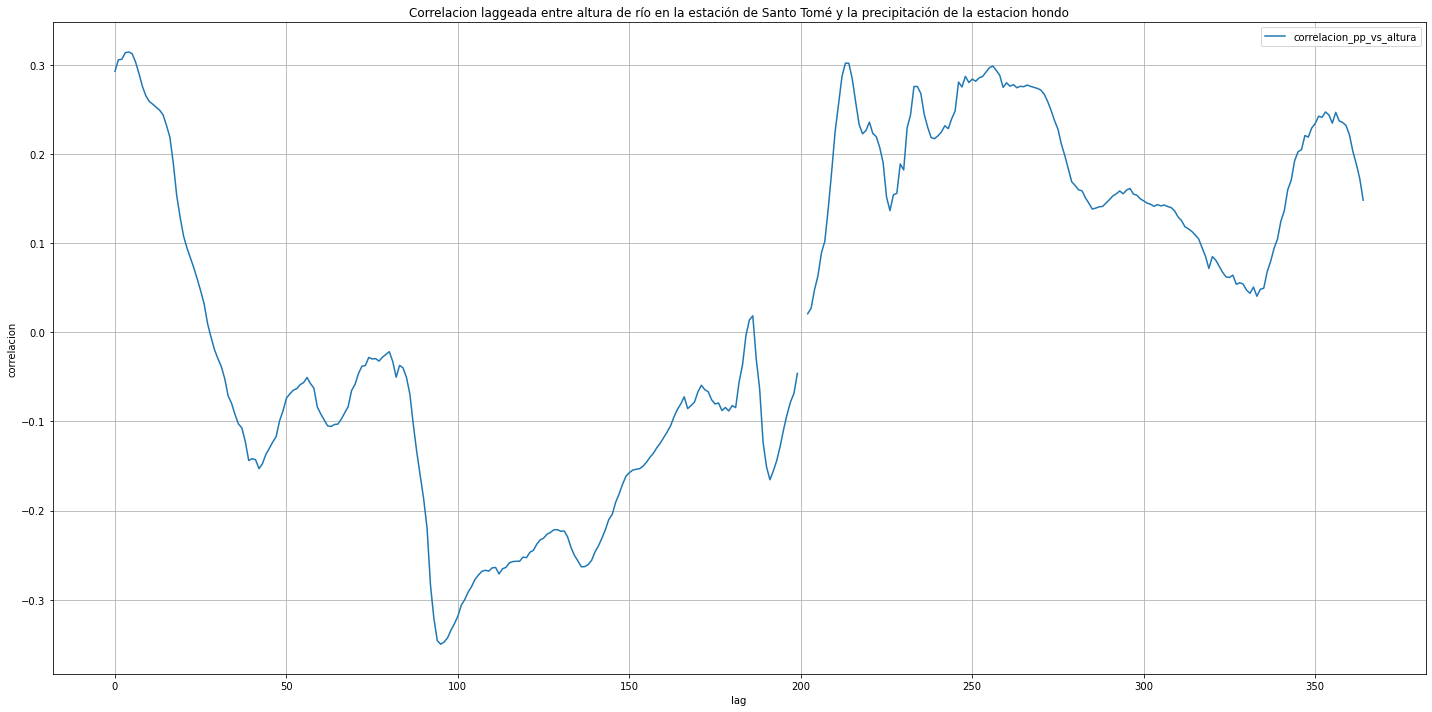

In [240]:
estacion = 'hondo'
correlaciones = [crosscorr(pd.Series(ds_pp_rango[estacion]), pd.Series(ds_santoto, index=ds_pp_rango.index), lag=i) for i in range(365)]
pd.DataFrame(correlaciones,columns=['correlacion_pp_vs_altura'], index=np.arange(len(correlaciones))).plot(figsize=(20,10),xlabel='lag', ylabel='correlacion', legend=True)
plt.grid()
plt.title('Correlacion laggeada entre altura de río en la estación de Santo Tomé y la precipitación de la estacion {}'.format(estacion))
plt.tight_layout()

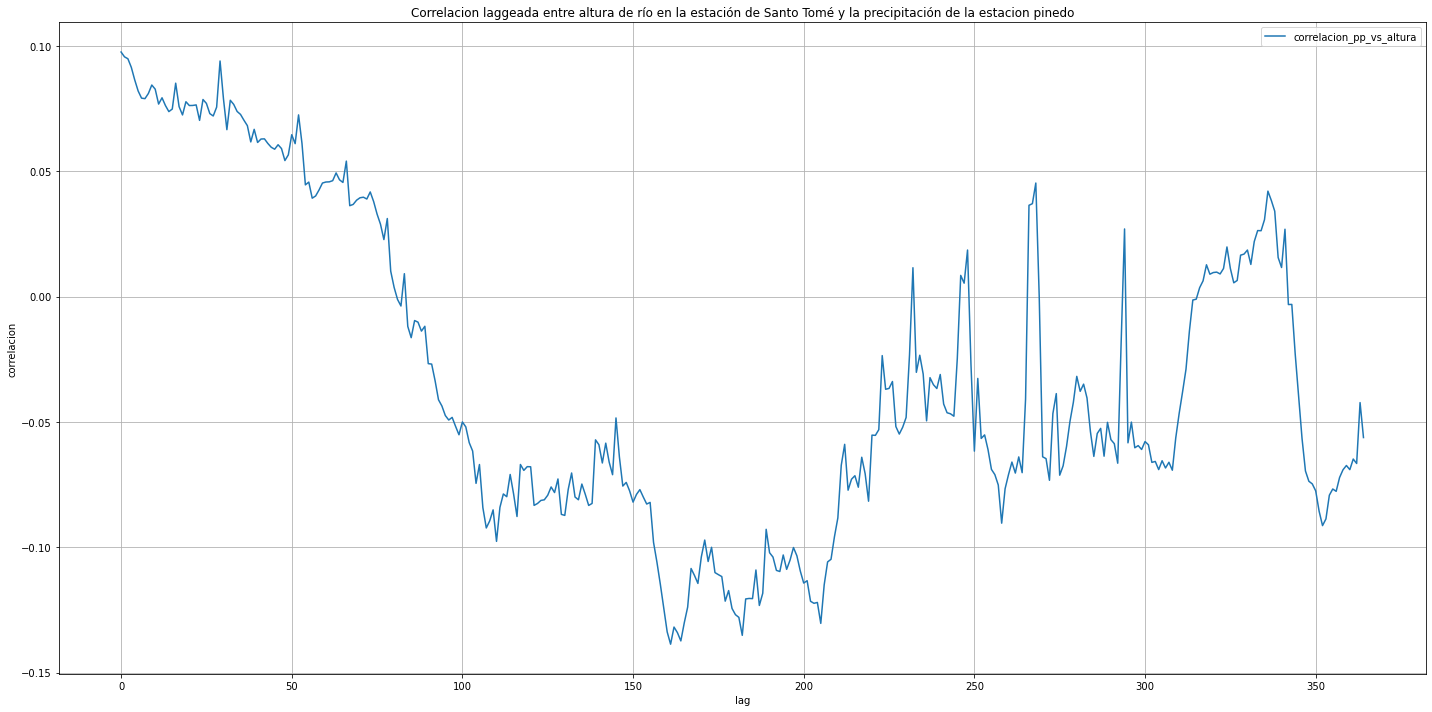

In [241]:
estacion = 'pinedo'
correlaciones = [crosscorr(pd.Series(ds_pp_rango[estacion]), pd.Series(ds_santoto, index=ds_pp_rango.index), lag=i) for i in range(365)]
pd.DataFrame(correlaciones,columns=['correlacion_pp_vs_altura'], index=np.arange(len(correlaciones))).plot(figsize=(20,10),xlabel='lag', ylabel='correlacion', legend=True)
plt.grid()
plt.title('Correlacion laggeada entre altura de río en la estación de Santo Tomé y la precipitación de la estacion {}'.format(estacion))
plt.tight_layout()